In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from functions import nufit_params_nsi, r_earth
from numerical import P_num_over_E
from analytical import P_an
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{siunitx}')
np.set_printoptions(linewidth=200)
from src.plotter import savethesis

In [36]:
E_range = np.logspace(0,3,500)
P = P_num_over_E(flavor_from='m', E = E_range, params=nufit_params_nsi)

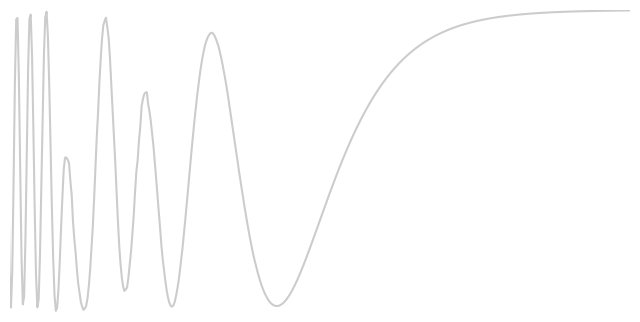

In [52]:
plt.plot(E_range,P[1],c='k', alpha=0.2)
plt.xlim((1.5, E_range.max()))
plt.ylim((0,1))
plt.xscale('log')
plt.axis('off')
plt.savefig("./thesis/tex/figures/pretty_osc.pdf", bbox_inches='tight')

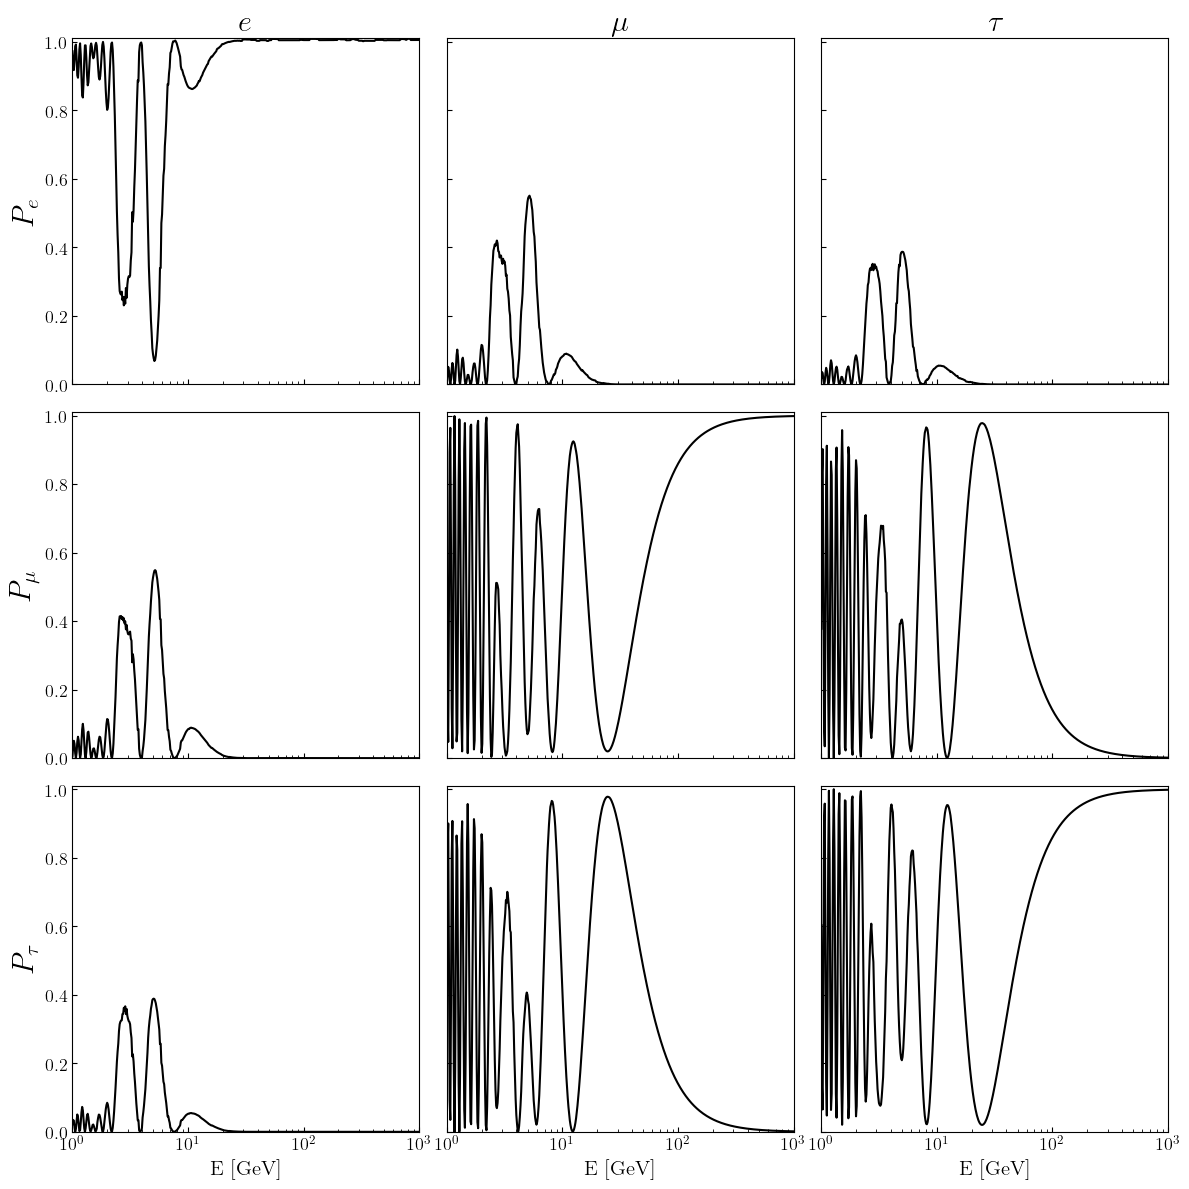

In [16]:
flavor_from_list = ['e','m','t']
flavor_to_list = ['e','m','t']
flavor_list = [r'e',r'\mu',r'\tau']
styles = ['solid','dotted','dashed']
colors = ['blue','red','green']
ncols= len(flavor_from_list)
nrows = len(flavor_to_list)
E_range= np.logspace(0,3,500)
fig, ax = plt.subplots(nrows,ncols, sharex=True, sharey=True, figsize=(12,12))
for col,flavor_from in enumerate(flavor_from_list):
    ax[0,col].set_title(f'${flavor_list[col]}$', fontsize=22)
    ax[2,col].set_xlabel(r'E [GeV]', fontsize=15)
    for row,flavor_to in enumerate(flavor_to_list):
        y = P_num_over_E(flavor_from=flavor_from, E = E_range, params=nufit_params_nsi)
        #x_an,y_an = P_an(flavor_from, flavor_to, param, E, L,  param_min, param_max, material,earth_start, ndim)
        #ax[col,row].plot(x_an,y_an, linestyle=styles[0])
        ax[row,col].plot(E_range,y[row].reshape(-1), linestyle=styles[0], c='black')
        ax[row,col].set_xlim((E_range.min(),E_range.max()))
        ax[row,col].set_xscale('log')
        ax[row,col].set_ylim((0,1.01))
        ax[row,0].set_ylabel(f'$P_{flavor_list[row]}$', fontsize=22)
        ax[row,col].tick_params(axis='both', direction='in', which='both', labelsize=13)
plt.tight_layout()
plt.subplots_adjust(wspace=0.08, hspace=0.08)
savethesis(fig, 'oscillations')

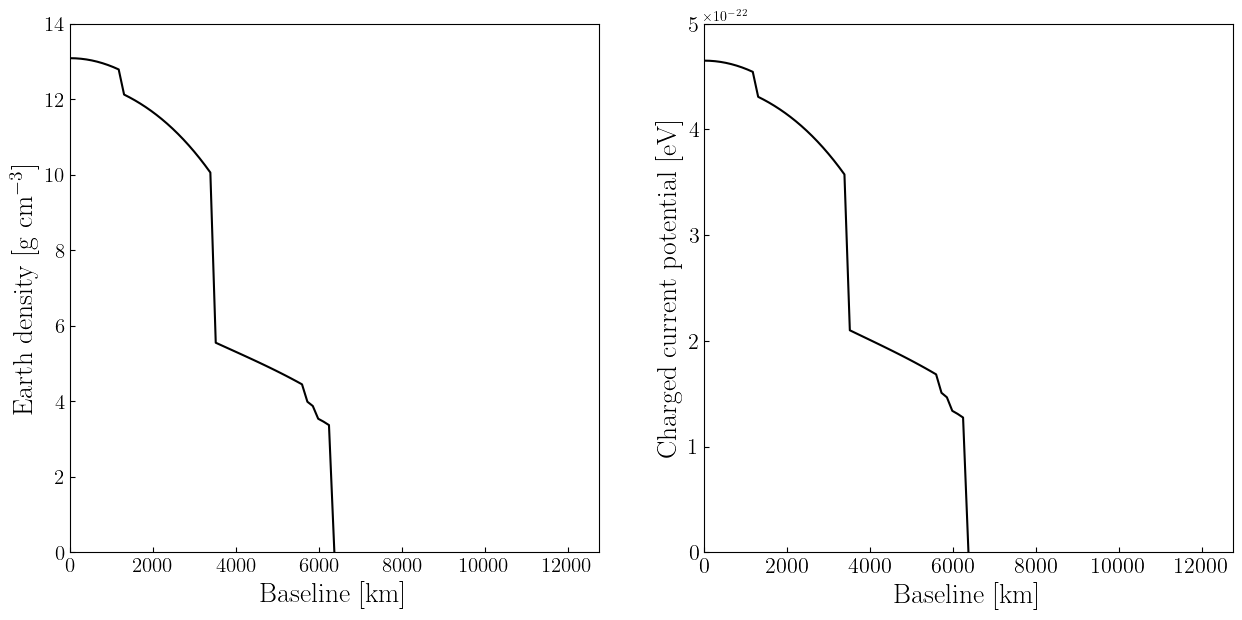

In [34]:
from functions import rho_earth,V
fig,ax = plt.subplots(1,2, figsize=(15,7))
L_range = np.linspace(0,r_earth,50)
ax[0].plot(L_range, rho_earth(L_range), c='k')
ax[0].set_xlabel('Baseline [km]', fontsize=20)
ax[0].set_ylabel(r'Earth density [$\mathrm{g\,\, cm^{-3}}$]', fontsize=20)
ax[0].tick_params(axis='both', direction='in', which='both', labelsize=15)

ax[1].plot(L_range, [V(L)[0] for L in L_range], c='k')
ax[1].set_xlabel('Baseline [km]', fontsize=20)
ax[1].set_ylabel(r'Charged current potential [eV]', fontsize=20)
ax[1].tick_params(axis='both', direction='in', which='both', labelsize=16)
ax[0].set_xlim((0,2*r_earth))
ax[0].set_ylim((0,14))
ax[1].set_xlim((0,2*r_earth))
ax[1].set_ylim((0,5e-22))
savethesis(fig,'potential')

<ipython-input-50-59a7967f3dc1>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[row,col].pcolormesh(z_range,E_range,y.T, rasterized=True, vmin=0, vmax=1)


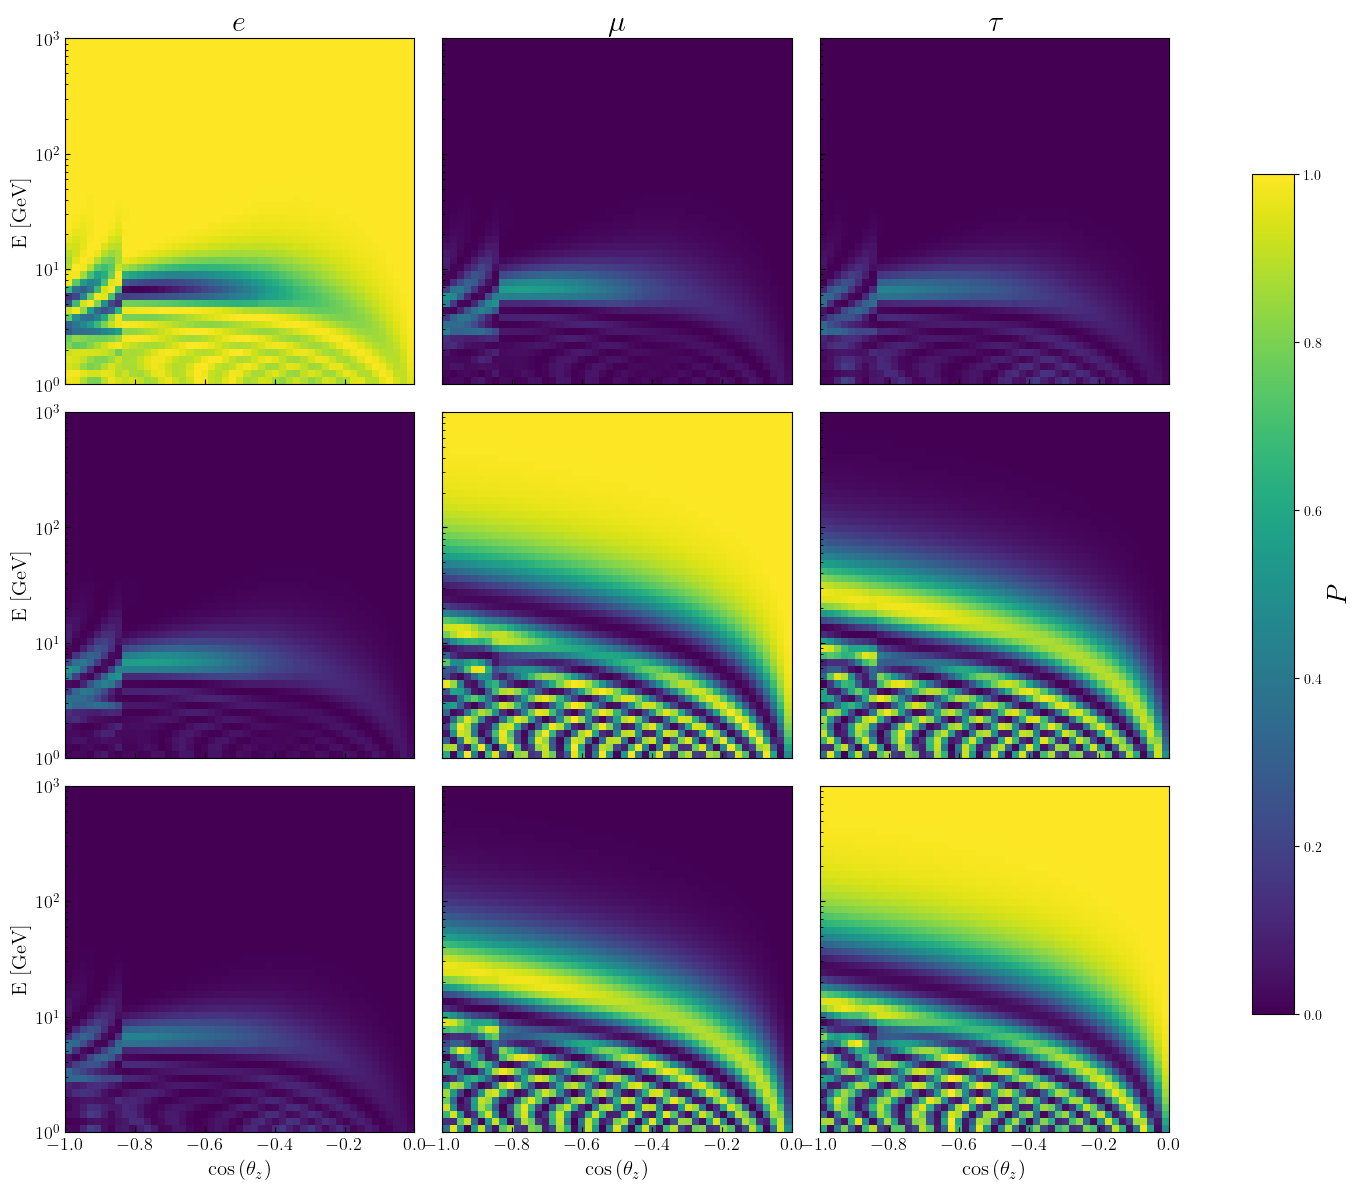

In [50]:
flavor_from_list = ['e','m','t']
flavor_to_list = ['e','m','t']
flavor_list = [r'e',r'\mu',r'\tau']
styles = ['solid','dotted','dashed']
colors = ['blue','red','green']
ncols= len(flavor_from_list)
nrows = len(flavor_to_list)
E_range= np.logspace(0,3,50)
z_range= np.linspace(-1,0,50)
fig, ax = plt.subplots(nrows,ncols, sharex=True, sharey=True, figsize=(12,12))
for col,flavor_from in enumerate(flavor_from_list):
    ax[0,col].set_title(f'${flavor_list[col]}$', fontsize=22)
    for row,flavor_to in enumerate(flavor_to_list):
        y_list = []
        for z in z_range:
            y = P_num_over_E(flavor_from=flavor_from, E = E_range, zenith=z ,params=nufit_params_nsi)
            y_list.append(y[row])
        y = np.array(y_list).reshape(50,50)
        #x_an,y_an = P_an(flavor_from, flavor_to, param, E, L,  param_min, param_max, material,earth_start, ndim)
        #ax[col,row].plot(x_an,y_an, linestyle=styles[0])
        im = ax[row,col].pcolormesh(z_range,E_range,y.T, rasterized=True, vmin=0, vmax=1)
        ax[row,col].set_xlim((z_range.min(),z_range.max()))
        ax[row,col].set_ylim((E_range.min(),E_range.max()))
        ax[row,col].set_yscale('log')
        ax[2,col].set_xlabel(r'$\cos{(\theta_z)}$', fontsize=15)
        ax[row,0].set_ylabel(r'E [GeV]', fontsize=15)
        ax[row,col].tick_params(axis='both', direction='in', which='both', labelsize=13)
plt.tight_layout()

cax = fig.add_axes([0.75, 0.15, 0.35, 0.7])
cbar = plt.colorbar(im, ax=cax, pad=1.45)
cbar.set_label(r'$P$', fontsize=20)
_=cax.axis('off')

plt.subplots_adjust(wspace=0.08, hspace=0.08)
savethesis(fig, 'oscillograms')

In [2]:
from analytical import P_an

In [10]:
Pmm = P_an('m','m','E',params=nufit_params_nsi, L=2*r_earth, param_min=1, param_max=1e2)
Pme = P_an('m','e','E',params=nufit_params_nsi, L=2*r_earth, param_min=1, param_max=1e2)
Pmt = P_an('m','t','E',params=nufit_params_nsi, L=2*r_earth, param_min=1, param_max=1e2)

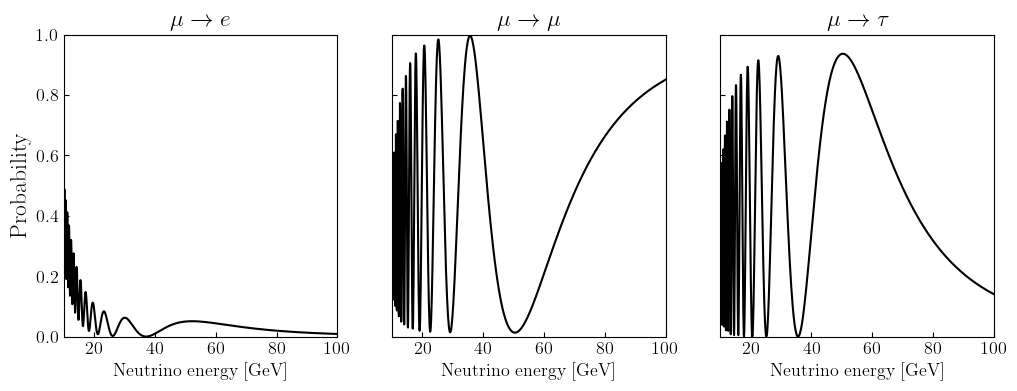

In [32]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
ax[0].plot(np.logspace(1,2,500), Pme,c='k')
ax[1].plot(np.logspace(1,2,500), Pmm,c='k')
ax[2].plot(np.logspace(1,2,500), Pmt,c='k')

#ax[0].set_xscale('log')
#ax[1].set_xscale('log')
#ax[2].set_xscale('log')

ax[0].set_ylim((-0,1.))
ax[0].set_xlim((1e1,1e2))
ax[1].set_xlim((1e1,1e2))
ax[2].set_xlim((1e1,1e2))
ax[0].set_ylabel('Probability',fontsize=17)
ax[0].set_title(r'$\mu \to e$',fontsize=17)
ax[1].set_title(r'$\mu \to \mu$',fontsize=17)
ax[2].set_title(r'$\mu \to \tau$',fontsize=17)

ax[0].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[1].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[2].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)


ax[0].tick_params(axis='both', direction='in', which='both', labelsize=13)
ax[1].tick_params(axis='both', direction='in', which='both', labelsize=13)
ax[2].tick_params(axis='both', direction='in', which='both', labelsize=13)
savethesis(fig, 'vac_osc')